# 第4章 机器学习基础
本章着重于解决机器学习任务：模型评估、数据预处理、特征工程、解决过拟合。
## 4.1 机器学习的四个分支
### 4.1.1 监督学习
监督学习（supervised learning）：多分类、二分类和标量回归问题  
序列生成（sequence generation）：给一张图片，预测描述图像的文字。  
语法树预测（syntax tree prediction）：给定一个句子，预测其分解成语法树。  
目标检测（object detection）:给定一个图像，画一个边界框，对每个框进行分类或分类与回归联合问题。  
图像分割（image segmentation）:给定一张图像，在特定物体上画一个像素级的掩模（mask）。

### 4.1.2 无监督学习
降维（dimensionality reduction）  
聚类(cluster)  

### 4.1.3 自监督学习
自编码器（autoencoder），给定目标是未经修改的输入。给定视频过去的帧，然后预测下一帧，或者给定文本前面的词预测下一个词，也属于时序监督学习（temporarilly sypervised learning)。  
同时自监督学习可以被理解为无监督或者监督学习。

### 4.1.4 强化学习
可以适用于自动驾驶汽车、机器人、资源管理、教育等。

## 4.2 评估机器学习模型
由钱一章可以看到在几个训练集上模型评估：仅仅几轮过后，三个模型都开始过拟合。机器去学习的目的是得到可以泛化（generalize）的模型

### 4.2.1 训练集、验证集和测试机
信息泄露（information leak）：每次基于模型在验证集上的醒来来调节模型超参数，都会有一些关于验证数据的信息泄露到模型，很快会导致模型过拟合。  
三种经典的评估方法：简单的留出验证、K折验证，以及有打乱数据的重复K折验证。

1.简单的留出验证（hold-out validation）  
留出一定比例的数据集作为测试集。在剩余数据上训练模型。

In [ ]:
# 4-1 留出验证
import numpy as np
num_validation_samples = 10000

# 打乱数据
np.random.shuffle(data)

# 定义验证集
validation_data = data[:num_validation_samples]
data = data[num_validation_samples:]

training_data = data[:]

model = get_model()
model.train(training_data)
validation_score = model.evaluate(validation_data)

# 重新调节模型、评估、然后再次调节
model = get_model()
model.train(np.concatenate([training_data, validation_data]))
test.score = model.evaluate(test_data)

缺点：如果可用的数据很少，那么可能验证集和测试集包含的样本就太少。

2.K折验证
K-fold validation将数据划分为大小相同的K个分区。  
对于每个分区K进行测试，在剩余的分区上训练模型。

In [ ]:
# 4-2 K折交叉验证
k = 4
num_validation_samples= len(data) // k
np.random.shuffle(data)

validation_scores = []
for fold in range(k):
    validation data = data[num_validation_samples * fold: 
                           num_validation_samples * (flod + 1):]
    training_data = data[:num_validation_samples * fold] + 
                    data[num_validation_samples * (fold + 1):]
    model = get_model()
    model.train(training_data)
    validation_score = model.evaluate(validation_data)
    validation_scores.append(validation_score)

validation_score = np.average(validation_scores)

model = get_model()
model.train(data)
test_score = mdoel.evaluate(test_data)

3.带有打乱数据的重复K折验证iterated K-fold validation with shuffling  
一共需要训练和评估PxK个模型。

### 4.2.2 评估模型的注意事项
数据代表性(data representativeness):希望训练集和测试集都能代表当前数据(通常需要随机打乱数据)  
时间箭头(the arrow of time):根据过去预测未来数据，不应该随机打乱数据，不然会发生时间泄露。应保证测试集所有数据都晚于训练集。  
数据冗余(redundancy in your data):某些数据点出现了两次，必须保证训练集和验证集之间没有交集。

## 4.3 数据预处理、特征过程和特征学习
### 4.3.1 神经网络的数据预处理
数据预处理的目的是使原始数据更适合用于神经网络处理，包括向量化、标准化、处理缺失值和特征提取。  
1.向量化  
神经网络的所有输入和目标都必须是浮点数张量。（data vectorization）
2.值标准化  
取值小、同质性（homogenous）  
3.处理缺失值  
### 4.3.2 特征过程
从更高层次理解问题  


## 4.4 过拟合和欠拟合
降低过拟合的方法-正则化（regularization）
### 4.4.1 减小网络大小

In [1]:
# 用imdb数据测试
# 3-1 加载IMDB数据库
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print(train_data[0])
print(train_labels[0])

# 可以迅速把某条评论解码为英文单词
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

# 3-2 将整数序列编码为二进制矩阵
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print(x_train[0])
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# 3-7 留出验证集
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Using TensorFlow backend.


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1
[0. 1. 1. ... 0. 0. 0.]


In [2]:
# 4-3 原始模型
from keras import models
from keras import layers

model1 = models.Sequential()
model1.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model1.add(layers.Dense(16, activation = 'relu'))
model1.add(layers.Dense(1, activation = 'sigmoid'))

# 4-4 容量更小的模型
model2 = models.Sequential()
model2.add(layers.Dense(4, activation = 'relu', input_shape=(10000,)))
model2.add(layers.Dense(4, activation = 'relu'))
model2.add(layers.Dense(1, activation = 'sigmoid'))

In [3]:
# 3-4 编译模型
model1.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
model2.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [4]:
history1 = model1.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))
history2 = model2.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 282us/step - loss: 0.5080 - acc: 0.7849 - val_loss: 0.3746 - val_acc: 0.8729
Epoch 2/20
15000/15000 [==============================] - 4s 245us/step - loss: 0.3007 - acc: 0.9020 - val_loss: 0.3248 - val_acc: 0.8679
Epoch 3/20
15000/15000 [==============================] - 4s 236us/step - loss: 0.2195 - acc: 0.9274 - val_loss: 0.2823 - val_acc: 0.8895
Epoch 4/20
15000/15000 [==============================] - 3s 215us/step - loss: 0.1719 - acc: 0.9441 - val_loss: 0.2749 - val_acc: 0.8882
Epoch 5/20
15000/15000 [==============================] - 3s 219us/step - loss: 0.1406 - acc: 0.9551 - val_loss: 0.3117 - val_acc: 0.8787
Epoch 6/20
15000/15000 [==============================] - 3s 220us/step - loss: 0.1128 - acc: 0.9654 - val_loss: 0.2999 - val_acc: 0.8848
Epoch 7/20
15000/15000 [==============================] - 3s 220us/step - loss: 0.0966 - acc: 0.9696 - val_loss: 0.3169 - 

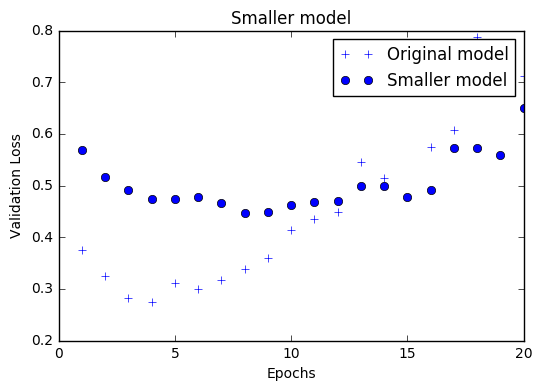

In [6]:
# 3-9 绘制训练损失和验证损失
import matplotlib.pyplot as plt

history1_dict = history1.history
history2_dict = history2.history
loss_values = history1_dict['loss']

val_loss_values1 = history1_dict['val_loss']
val_loss_values2 = history2_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, val_loss_values1, '+', label = 'Original model')
plt.plot(epochs, val_loss_values2, 'bo', label = 'Smaller model')
plt.title('Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

In [7]:
# 4-5 容量更大的模型
model3 = models.Sequential()
model3.add(layers.Dense(512, activation = 'relu', input_shape=(10000,)))
model3.add(layers.Dense(512, activation = 'relu'))
model3.add(layers.Dense(1, activation = 'sigmoid'))

model3.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

history3 = model3.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 15s 991us/step - loss: 0.5423 - acc: 0.7408 - val_loss: 0.3727 - val_acc: 0.8378
Epoch 2/20
15000/15000 [==============================] - 13s 857us/step - loss: 0.2619 - acc: 0.8981 - val_loss: 0.2710 - val_acc: 0.8892
Epoch 3/20
15000/15000 [==============================] - 13s 882us/step - loss: 0.1576 - acc: 0.9413 - val_loss: 0.2940 - val_acc: 0.8900
Epoch 4/20
15000/15000 [==============================] - 14s 912us/step - loss: 0.0930 - acc: 0.9691 - val_loss: 0.3535 - val_acc: 0.8865
Epoch 5/20
15000/15000 [==============================] - 13s 882us/step - loss: 0.1020 - acc: 0.9767 - val_loss: 0.3209 - val_acc: 0.8821
Epoch 6/20
15000/15000 [==============================] - 13s 891us/step - loss: 0.0070 - acc: 0.9999 - val_loss: 0.4624 - val_acc: 0.8892
Epoch 7/20
15000/15000 [==============================] - 13s 861us/step - loss: 8.8153e-04 - acc: 0.9999 - val_loss

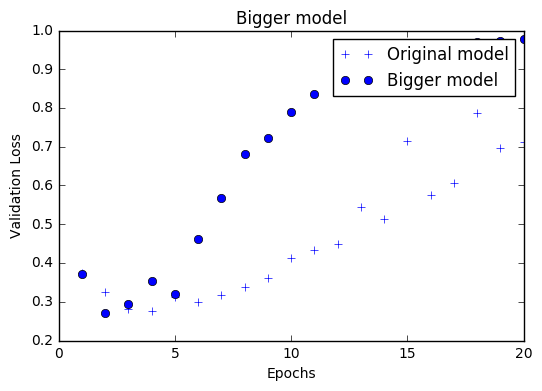

In [8]:
import matplotlib.pyplot as plt

history1_dict = history1.history
history3_dict = history3.history
loss_values = history1_dict['loss']

val_loss_values1 = history1_dict['val_loss']
val_loss_values3 = history3_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, val_loss_values1, '+', label = 'Original model')
plt.plot(epochs, val_loss_values3, 'bo', label = 'Bigger model')
plt.title('Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

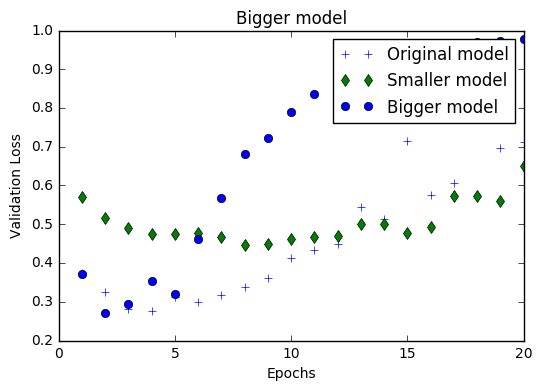

In [9]:
import matplotlib.pyplot as plt

history1_dict = history1.history
history2_dict = history2.history
history3_dict = history3.history
loss_values = history1_dict['loss']

val_loss_values1 = history1_dict['val_loss']
val_loss_values2 = history2_dict['val_loss']
val_loss_values3 = history3_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, val_loss_values1, '+', label = 'Original model')
plt.plot(epochs, val_loss_values2, 'd', label = 'Smaller model')
plt.plot(epochs, val_loss_values3, 'bo', label = 'Bigger model')
plt.title('Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

### 4.4.2 添加权重正则化
L1正则化  
L2正则化


In [10]:
# 4-6 向模型添加L2权重正则化
from keras import models
from keras import layers
from keras import regularizers
import matplotlib.pyplot as plt

model4 = models.Sequential()
# 每个系数都会使总网络损失增加0.001 * weight_coefficient_value
model4.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001), activation = 'relu', input_shape=(10000,)))
model4.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001), activation = 'relu'))
model4.add(layers.Dense(1, activation = 'sigmoid'))

model4.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

history4 = model4.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 267us/step - loss: 0.5697 - acc: 0.7878 - val_loss: 0.4836 - val_acc: 0.8253
Epoch 2/20
15000/15000 [==============================] - 3s 219us/step - loss: 0.3743 - acc: 0.8947 - val_loss: 0.3674 - val_acc: 0.8752
Epoch 3/20
15000/15000 [==============================] - 3s 227us/step - loss: 0.2945 - acc: 0.9183 - val_loss: 0.3343 - val_acc: 0.8888
Epoch 4/20
15000/15000 [==============================] - 3s 231us/step - loss: 0.2553 - acc: 0.9299 - val_loss: 0.3376 - val_acc: 0.8831
Epoch 5/20
15000/15000 [==============================] - 3s 226us/step - loss: 0.2335 - acc: 0.9395 - val_loss: 0.3426 - val_acc: 0.8820
Epoch 6/20
15000/15000 [==============================] - 3s 226us/step - loss: 0.2178 - acc: 0.9469 - val_loss: 0.3334 - val_acc: 0.8842
Epoch 7/20
15000/15000 [==============================] - 3s 207us/step - loss: 0.2032 - acc: 0.9523 - val_loss: 0.3404 - 

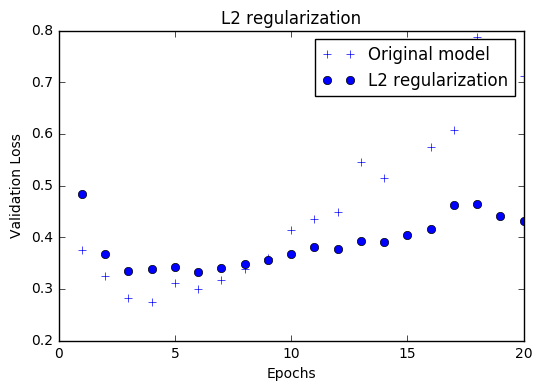

In [11]:
history1_dict = history1.history
history4_dict = history4.history
loss_values = history1_dict['loss']

val_loss_values1 = history1_dict['val_loss']
val_loss_values4 = history4_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, val_loss_values1, '+', label = 'Original model')
plt.plot(epochs, val_loss_values4, 'bo', label = 'L2 regularization')
plt.title('L2 regularization')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

### 4.4.3 添加dropout正则化
Geoffrey Hinton  
训练时随机将矩阵一部分值设为0  
model.add(layers.Dropout(0.5))

In [12]:
# 4-8 向IMDB网络中添加dropout
model5 = models.Sequential()
model5.add(layers.Dense(16,activation = 'relu', input_shape=(10000,)))
model5.add(layers.Dropout(0.5))
model5.add(layers.Dense(16, activation = 'relu'))
model5.add(layers.Dropout(0.5))
model5.add(layers.Dense(1, activation = 'sigmoid'))

model5.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

history5 = model5.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 289us/step - loss: 0.6385 - acc: 0.6223 - val_loss: 0.5542 - val_acc: 0.8390
Epoch 2/20
15000/15000 [==============================] - 3s 229us/step - loss: 0.5397 - acc: 0.7460 - val_loss: 0.4589 - val_acc: 0.8378
Epoch 3/20
15000/15000 [==============================] - 3s 221us/step - loss: 0.4616 - acc: 0.8119 - val_loss: 0.4039 - val_acc: 0.8516
Epoch 4/20
15000/15000 [==============================] - 3s 213us/step - loss: 0.4007 - acc: 0.8476 - val_loss: 0.3367 - val_acc: 0.8835
Epoch 5/20
15000/15000 [==============================] - 3s 213us/step - loss: 0.3485 - acc: 0.8762 - val_loss: 0.3148 - val_acc: 0.8865
Epoch 6/20
15000/15000 [==============================] - 3s 211us/step - loss: 0.3083 - acc: 0.9006 - val_loss: 0.3081 - val_acc: 0.8869
Epoch 7/20
15000/15000 [==============================] - 3s 211us/step - loss: 0.2714 - acc: 0.9154 - val_loss: 0.3058 - 

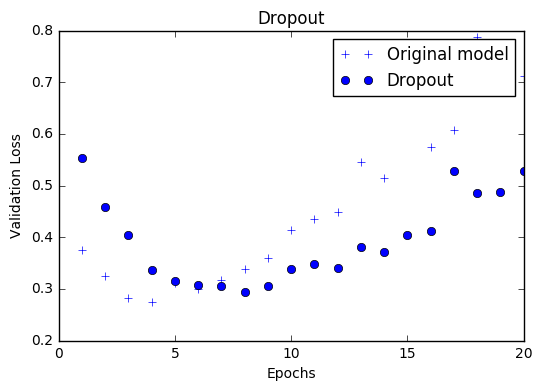

In [13]:
history1_dict = history1.history
history5_dict = history5.history
loss_values = history1_dict['loss']

val_loss_values1 = history1_dict['val_loss']
val_loss_values5 = history5_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, val_loss_values1, '+', label = 'Original model')
plt.plot(epochs, val_loss_values5, 'bo', label = 'Dropout')
plt.title('Dropout')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

## 总结常见防止过拟合的方法：
获取更多的训练数据  
减小网络容量  
添加权重正则化  
添加dropout

## 4.5 机器学习的通用工作流程
### 4.5.1 定义问题，收集数据集
### 4.5.2 选择衡量成功的标准
准确率（precision）  
召回率（recall）  
ROC/AUC
### 4.5.3 确定评估方法
留出验证集  
K折交叉检验  
重复的K折验证  
### 4.5.4 准备数据
### 4.5.5 开发比基准更好的模型
最后一层的激活  
损失函数  
优化配置
### 4.5.6 扩大模型规模：开发过拟合模型
添加更多的层  
让每一层更大  
训练更多的轮次
### 4.5.7 模型正则化与调节超参数
添加dropout  
尝试不同的架构；增加或减少层数  
添加L1正则或者L2正则  
尝试不同的超参数，如每一层的单元格数或者优化器的学习率  
反复做特征工程

work：测试L1正则化以及同时L1和L2正则化  
regularizers.l1(0.001)  
regularizers.l1_l2(l1=0.001, l2=0.001